# Evaluate the training result 
Training analysis is a a tool to evaluate the training result of lenet5 neural network. It could display the accuracy on training set and test set in graph. Or you can check the test datato show the image which is wrongly predicted in each batch of test data evaluation. 

## Define the variables to track
There are 5 variables to monitor during the training.
- Training accuracy
- Test accuracy
- Test images
- Test labels
- Prediction in test

In [3]:
import os 
import matplotlib.pyplot as plt
import tf_general as tfg
from cifar10 import cifar10
cifar_data = cifar10()

train set length: 50000
test set length: 10000


In [9]:
class log_file(object): 
    def __init__(self,log_dir,name=''):
        self.name = name
        self.log_dir = log_dir
    def load_data(self, variable_name):
        return tfg.readlog(self.log_dir+variable_name,variable_name)
        """
        self.train_accuracy = tfg.readlog(log_file_name,'train_accuracy')
        self.test_accuracy = tfg.readlog(log_file_name,'test_accuracy')
        self.loss = tfg.readlog(log_file_name,'train_loss')
        self.test_index = tfg.readlog(log_file_name,'test_index')
        self.output = tfg.readlog(log_file_name,'output')
        """

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


## Display training accuracy vs. test accuracy

In [20]:
def show_chart(accuracy):
    plt.rcParams['figure.dpi'] = 150   
    legend = []
    labels = []
    i = 0
    for listitem in accuracy:
        step = []
        step_accuracy = []
        for item in listitem[1]:
            step.append(item[0])
            step_accuracy.append(item[1])
        plt.plot(step, step_accuracy,label=listitem[0])
        i += 1
    plt.legend(loc='best')
    plt.show()
    

## Compare the test accuracy with different super parameters

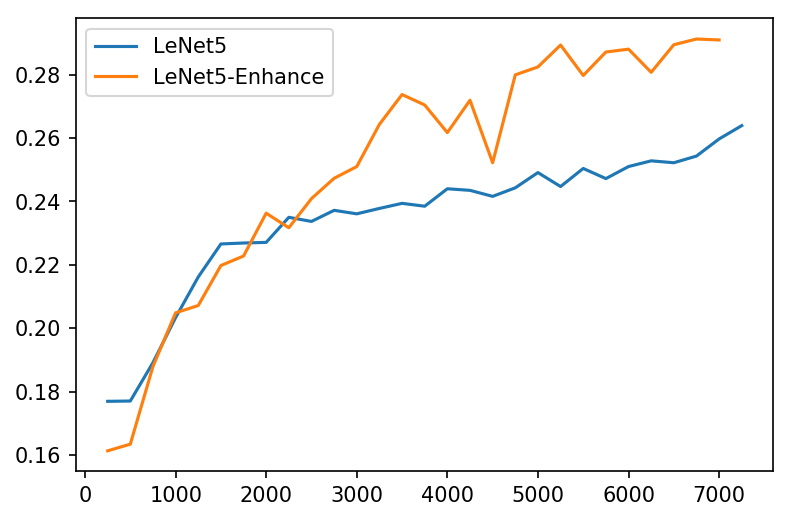

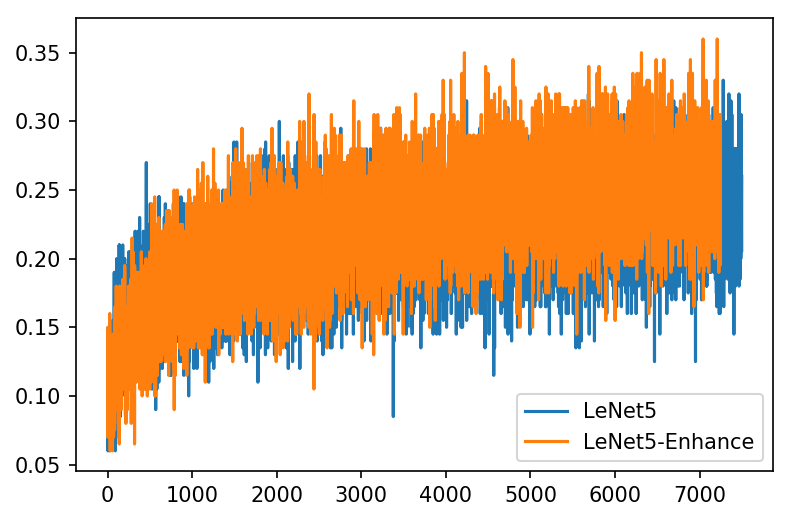

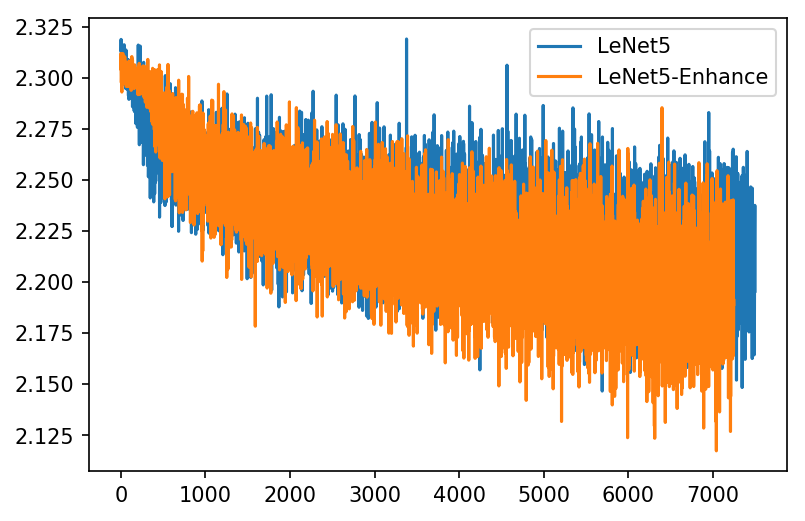

In [28]:
log_dir_0 = 'log_0/'
log_dir_1 = 'log_1/'
"""
log_dir_2 = 'lenet_train_cifar10_2.log'
log_dir_3 = 'lenet_train_cifar10_3.log'
log_dir_4 = 'lenet_train_cifar10_4.log'
"""
log_data_0 = log_file(log_dir_0, name='LeNet5')  
log_data_1 = log_file(log_dir_1, name='LeNet5-Enhance')  
test_acuracy_0 = log_data_0.load_data('test_accuracy')
test_acuracy_1 = log_data_1.load_data('test_accuracy')
#x_norm = log_data_0.load_data('x_norm')
#print(x_norm)

"""
log_data_1 = log_file(log_file_1,name='keep_prob=0.6') 
log_data_2 = log_file(log_file_2,name='keep_prob=0.7') 
log_data_3 = log_file(log_file_3,name='keep_prob=0.8') 
log_data_4 = log_file(log_file_4,name='keep_prob=0.9') 
"""
show_chart([[log_data_0.name,test_acuracy_0],[log_data_1.name,test_acuracy_1]])

train_acuracy_0 = log_data_0.load_data('train_accuracy')
train_acuracy_1 = log_data_1.load_data('train_accuracy')

show_chart([[log_data_0.name,train_acuracy_0],[log_data_1.name,train_acuracy_1]])

train_loss_0 = log_data_0.load_data('train_loss')
train_loss_1 = log_data_1.load_data('train_loss')

show_chart([[log_data_0.name,train_loss_0],[log_data_1.name,train_loss_1]])

In [9]:
def show_loss(loss):
    plt.rcParams['figure.dpi'] = 150    
    step_train= []
    step_loss = []
    for item in loss:
        step_train.append(item[0])
        step_loss.append(item[1])
    plt.plot(step_train, step_loss)
    plt.show()

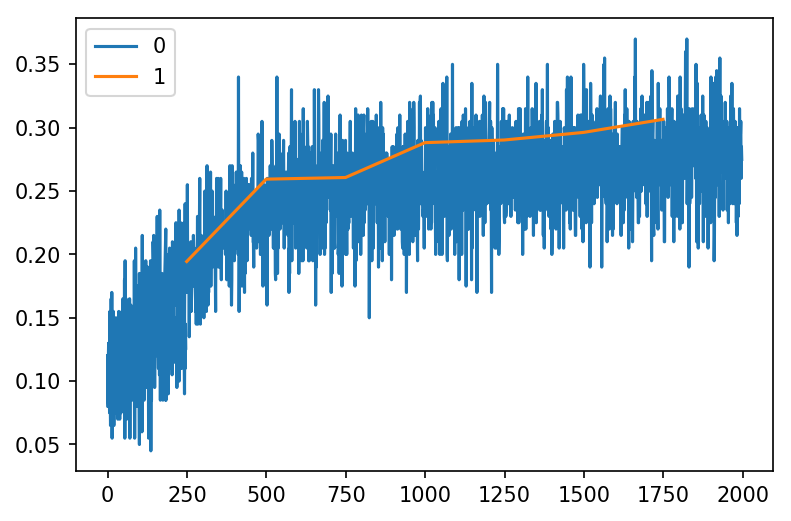

In [31]:
log_file_name = 'lenet_train_cifar10_0.log'
log_data = log_file(log_file_name)  
show_accuracy([log_data.train_accuracy, log_data.test_accuracy])
#show_loss(log_data.loss)

## Show test accuracy of specific training step
Date structure of category_wrong_prediction  [[correct label index, wrong label index ]

In [ ]:
step_test = []
step_test_accuracy = []
for item in test_accuracy:
    step_test.append(item[0])
    step_test_accuracy.append(item[1])
    
print('Available test steps:', step_test)
step = int(input('Please input the test step in below number:'))
if step in step_test: 
    plt.rcParams['figure.dpi'] = 16    
    for item in test_accuracy:
        if item[0] == step:
            print('Test accuracy at train step '+ str(step)+': '+str(round(item[1]*100,2))+'%')
       
    prediction = []
    for item in output:
        if item[0] == step: 
            prediction.append(item[1])
        
    labels = []
    for item in test_index:
        if item[0] == step: 
            labels.append(item[1])
    category_accuracy = {0:0.0,1:0.0,2:0.0,3:0.0,4:0.0,5:0.0,6:0.0,7:0.0,8:0.0,9:0.0}
    category_wrong_prediction={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
    i = 0
    while i < len(labels) and i< len(prediction):
        j = 0
        while j < len(labels[i]):
            if int(cifar_data.test_labels[int(labels[i][j])]) != int(prediction[i][j]):
                category_wrong_prediction[cifar_data.test_labels[int(labels[i][j])]].append([int(labels[i][j]),int(prediction[i][j])])
            else:
                category_accuracy[cifar_data.test_labels[int(labels[i][j])]] += 1
            j += 1        
        #if key == 'q':
            #break
        i += 1
    for k in range(9):
        category_accuracy[k] /= 1000
        print(cifar_data.label_dic[k] + ':' + str(round(category_accuracy[k]*100,2)) + '%')
    key = input('Do you want to see those images with wrong label?Y/N')
               
    while key == 'y' or key == 'Y':
        cat =  input('Input a category number:')
        if int(cat) in [0,1,2,3,4,5,6,7,8,9]:
            for item in category_wrong_prediction[int(cat)]:
                plt.imshow(cifar_data.test_images[item[0]])
                plt.show()
                print('label: '+ cifar_data.label_dic[cifar_data.test_labels[item[0]]]) 
                print('prediction: '+cifar_data.label_dic[item[1]])
                print('---------------------------------')
        
        key = input('Do you want to see another category?Y/N')
else:
    print('Invalid input.' + step + ' not exist in the list.')

In [ ]:
key = input('Please input a category number:')
distribution = {0:0.0,1:0.0,2:0.0,3:0.0,4:0.0,5:0.0,6:0.0,7:0.0,8:0.0,9:0.0}

if int(key) in [0,1,2,3,4,5,6,7,8,9]:
    for item in category_wrong_prediction[int(key)]:
        distribution[item[1]] += 1
for k in range(9):
    print(cifar_data.label_dic[k]+':' + str(round(distribution[k]/len(category_wrong_prediction[int(key)])*100,2))+'%')


## 

In [ ]:
from cifar10 import cifar10
import numpy as np
import matplotlib.pyplot as plt

data = cifar10()
batch_size=10
%matplotlib inline
plt.rcParams['figure.dpi'] = 28

for i in range(5):
    x, y,_ = data.get_train_batch(batch_size)
    #print ('batch_x shape',np.shape(x))
    for img in x:
        plt.imshow(np.array(img))
        plt.show()
        print('-----------------------')

In [59]:
import tensorflow as tf
input_data = tf.constant([[[1.0,2,3],[4.0,5,6]],[[3.0,2,1],[6.0,5,4]]])

output = tf.nn.l2_normalize(input_data, dim = 0)
with tf.Session() as sess:
    print(sess.run(input_data))
    print(sess.run(output))

[[[ 1.  2.  3.]
  [ 4.  5.  6.]]

 [[ 3.  2.  1.]
  [ 6.  5.  4.]]]
[[[ 0.31622776  0.70710671  0.94868326]
  [ 0.55470014  0.70710683  0.83205032]]

 [[ 0.94868326  0.70710671  0.31622776]
  [ 0.8320502   0.70710683  0.5547002 ]]]


In [1]:
import numpy as np
import tf_general as tfg

x = np.random.randint(255, size=(8,2,2,16), dtype = np.int64)
print(tfg.strlize(x))

[[[[134,43,238,58,25,159,172,179,144,237,117,158,51,93,40,78],[141,132,125,46,89,174,13,103,169,14,206,68,14,244,252,152]],[[5,8,59,31,211,194,17,152,117,76,36,243,18,165,74,183],[198,25,25,132,10,243,44,136,76,132,229,23,8,208,20,131]]],[[[105,89,173,126,175,190,106,112,98,223,172,56,23,200,114,149],[134,194,57,152,248,89,156,135,157,201,209,233,107,117,150,112]],[[244,49,16,34,189,229,46,151,59,22,230,209,239,69,171,70],[139,107,95,159,177,143,105,156,82,36,39,34,230,219,190,41]]],[[[129,64,38,228,188,37,187,72,160,187,201,242,149,2,156,231],[153,141,231,59,41,227,108,205,133,169,91,252,226,213,18,251]],[[32,43,65,128,112,144,148,78,96,239,188,167,107,114,66,40],[22,234,4,56,130,89,187,189,148,165,71,201,96,122,28,122]]],[[[151,33,191,3,43,159,99,200,162,171,216,56,82,193,156,247],[66,95,251,70,246,120,210,76,17,23,207,110,180,69,108,71]],[[155,19,61,186,37,65,8,42,3,166,187,229,182,180,131,90],[35,41,213,46,44,37,203,197,79,181,253,51,89,222,85,199]]],[[[63,103,157,47,127,113,151,1,